In [1]:
import scipy.io
import numpy as np
from neurokit2 import signal_filter

# Path to the .mat file
file_path = 'physionet2017challenge/training2017/A05956.mat'

# Load the .mat file
mat_data = scipy.io.loadmat(file_path)

# Display the content of the .mat file
print(np.array(mat_data['val'],dtype=np.float32))


[[ -21.  -25.  -29. ... -483. -453. -438.]]


In [2]:
import numpy as np
# Load the .mat file
mat_data = scipy.io.loadmat(file_path)

# Extract the array associated with the 'val' key
val_data = mat_data['val']

# Convert the extracted data to a NumPy array (if not already)
numpy_array = np.array(val_data).flatten()
len_ = numpy_array.shape[0]
#numpy_array = numpy_array[len_//10:1+(9*len_)//10]
numpy_array = numpy_array[1000:]
numpy_array = (numpy_array - np.min(numpy_array))/ (np.max(numpy_array)-np.min(numpy_array))

# Optionally, you can check the shape and dtype of the NumPy array
print("Shape of the array:", numpy_array.shape)
print("Data type of the array:", numpy_array.dtype)

Shape of the array: (8000,)
Data type of the array: float64


In [3]:
# Plot One 1D array of ECG with attention
import neurokit2 as nk
def refined_attention(att,threshold):
    retained_att_bool = att > threshold
    return retained_att_bool *att

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 1500
import numpy as np
import matplotlib.pyplot as plt
from ecg_plot import plot_1


#filename = 'A07323'
# Load the array from the .npy file
#file_path = file_path = 'ISI_2D_to_1D_data/' + str(filename) + '.npy'
#file_path = 'A01443.npy'
#data = np.load(file_path)
                  # only for A01443.npy
data= numpy_array
data =   data.flatten() 
#file_path2 = 'ISI_attention_2D_to_1D_data/' + str(filename) + '.npy'
#data2 = np.load(file_path2)
#data2 = data2/ np.max(data2)
#print(np.max(data2))
#data2 = refined_attention(att=data2,threshold=0.0) #* data

#data2 = data2/ np.max(data2)

clean_ecg = nk.ecg_clean(data,sampling_rate=300, method="hamilton2002") # 
#signal_filter(data,sampling_rate=300,order=2,method='butterworth_zi', lowcut=0.1,highcut=7.0)
#

In [4]:
# Retrieve ECG data from data folder
ecg_signal = clean_ecg
# Extract R-peaks locations
#ecg_signal = (ecg_signal - np.min(ecg_signal))/ (np.max(ecg_signal)-np.min(ecg_signal))


rsignals, rpeaks = nk.ecg_peaks(ecg_signal, method="hamilton2002",sampling_rate=300)

# Delineate the ECG signal
#_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=300, method="peak")



# Visualize P-peaks and T-peaks
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=300, 
                                         show_type='peaks',
                                         show=False)

index = {"S":[x for x in waves_dwt['ECG_S_Peaks'] if x == x],
         "P":[x for x in waves_dwt['ECG_P_Peaks'] if x == x],
         "Q":[x for x in waves_dwt['ECG_Q_Peaks'] if x == x],
         "T":[x for x in waves_dwt['ECG_T_Peaks'] if x == x],
         "R": rpeaks['ECG_R_Peaks']
}

peaks ={"S":np.array(signal_dwt["ECG_S_Peaks"]),
        "P":np.array(signal_dwt["ECG_P_Peaks"]),
        "Q":np.array(signal_dwt["ECG_Q_Peaks"]),
        "T":np.array(signal_dwt["ECG_T_Peaks"]),
        "R":np.array(rsignals["ECG_R_Peaks"])
}
print(peaks["R"])


differences = [ index["R"][i] -  index["R"][i-1] for i in range(1, len( index["R"]))]
print( index["R"])
print(differences)

[0 0 0 ... 0 0 0]
[  98  198  323  449  575  701  826  950 1075 1201 1335 1996 2114 2230
 2949 3073 3197 3320 3447 3571 3699 3815 3942 4058 4186 4310 4433 4551
 4674 4798 5454 5574 5688 5811 5936 6067 6191 6305 6427 6539 6672 6821
 6961 7096 7208 7945]
[100, 125, 126, 126, 126, 125, 124, 125, 126, 134, 661, 118, 116, 719, 124, 124, 123, 127, 124, 128, 116, 127, 116, 128, 124, 123, 118, 123, 124, 656, 120, 114, 123, 125, 131, 124, 114, 122, 112, 133, 149, 140, 135, 112, 737]


In [5]:
k = 5    #final for paper
#_,top_k_indices=top_k(area_list,k=k)  # mark 50 percent of rr intervals
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(2,1,figsize=(20, 2.5))
plot_1(ecg=data, attention =None, attention_area=None, top_k= None,
        peaks= peaks,valid_p_peaks=None,RR_length_outlier=None,peaks_index=index,at_thres=0.0,
        fig=fig, ax=ax[0], 
        sample_rate=300,line_w=1.0,
          title = 'ECG',
          ecg_amp=1.2,timetick=0.2)

plot_1(ecg=ecg_signal, attention =None, attention_area=None, top_k= None,
        peaks= peaks,valid_p_peaks=None,RR_length_outlier=None,peaks_index=index,at_thres=0.0,
        fig=fig, ax=ax[1], 
        sample_rate=300,line_w=1.0,
          title = 'ECG',
          ecg_amp=1.2,timetick=0.2)


#save_path = 'Final_plots_paper/' + str(filename) + '.jpg'   #attention_area =mod_attention, attention =data2,top_k = top_k_indices
# Save the plot with axes and markings
#plt.savefig(save_path)
#ax.xaxis.set_major_locator(MaxNLocator(integer=True, prune='both', nbins=10))  # Adjust nbins as needed
plt.tight_layout()
#plt.savefig('A06477.pdf',dpi=900)
plt.show()

## Two Dimensional Representation

In [6]:
import pandas as pd
path = '/home/saptarshi/Research/encoder_decoder/physionet2017challenge/'
af_name = 'A00004'
normal_name = 'A00222'
#af = pd.read_csv(path+'training_CSV/'+af+'.csv',header=None)
#af =np.array( af.values)



af = np.loadtxt(path+'training_CSV/'+af_name+'.csv', delimiter=' ', dtype=float)
ecg_af = np.load(path+'OneD_data/'+ af_name +'.npy')

#np.loadtxt(path+'OneD_data/'+af+'.csv')

normal = np.loadtxt(path+'training_CSV/'+normal_name+'.csv', delimiter=' ', dtype=float)
ecg_normal = np.load(path+'OneD_data/'+ normal_name +'.npy')


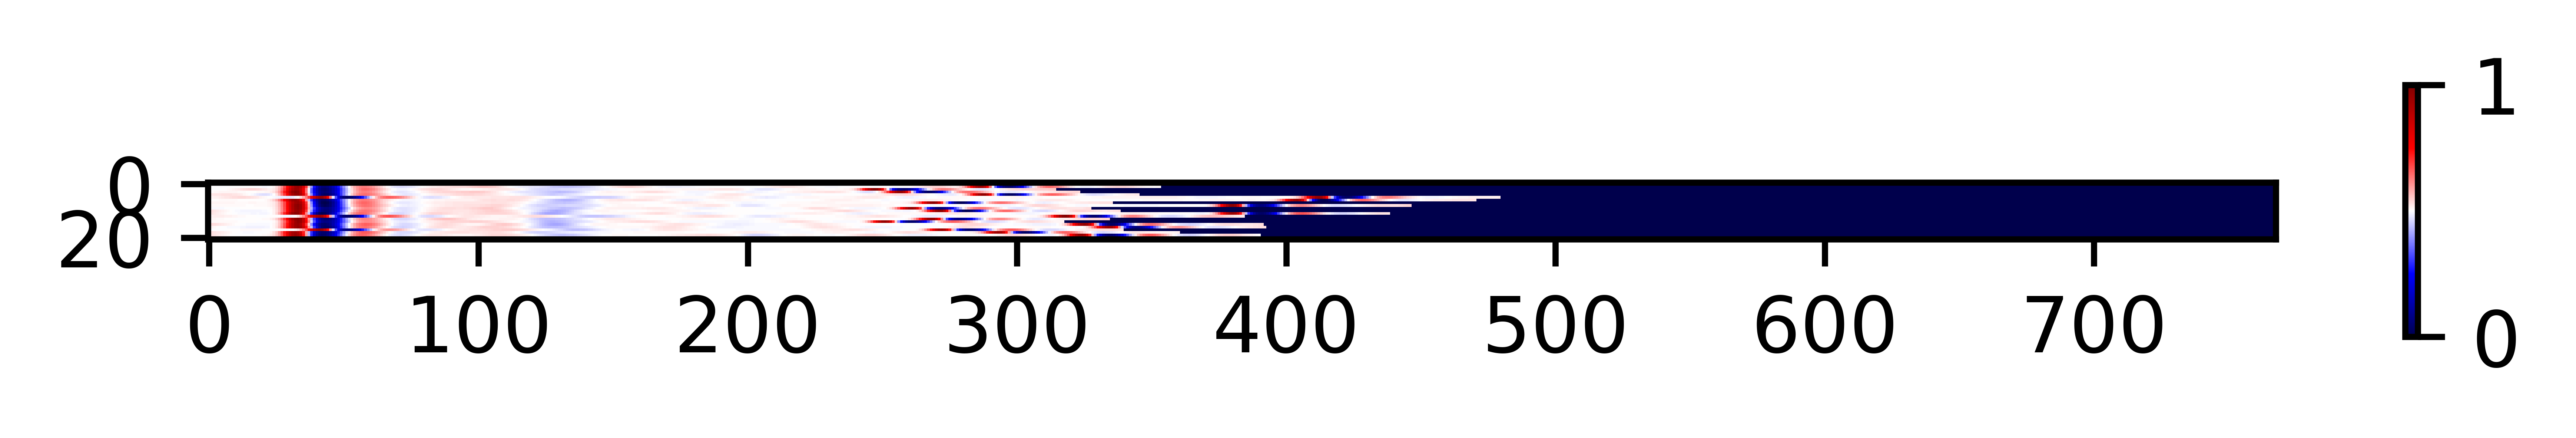

In [7]:
plt.imshow(af,cmap='seismic')
plt.colorbar(shrink=0.15)

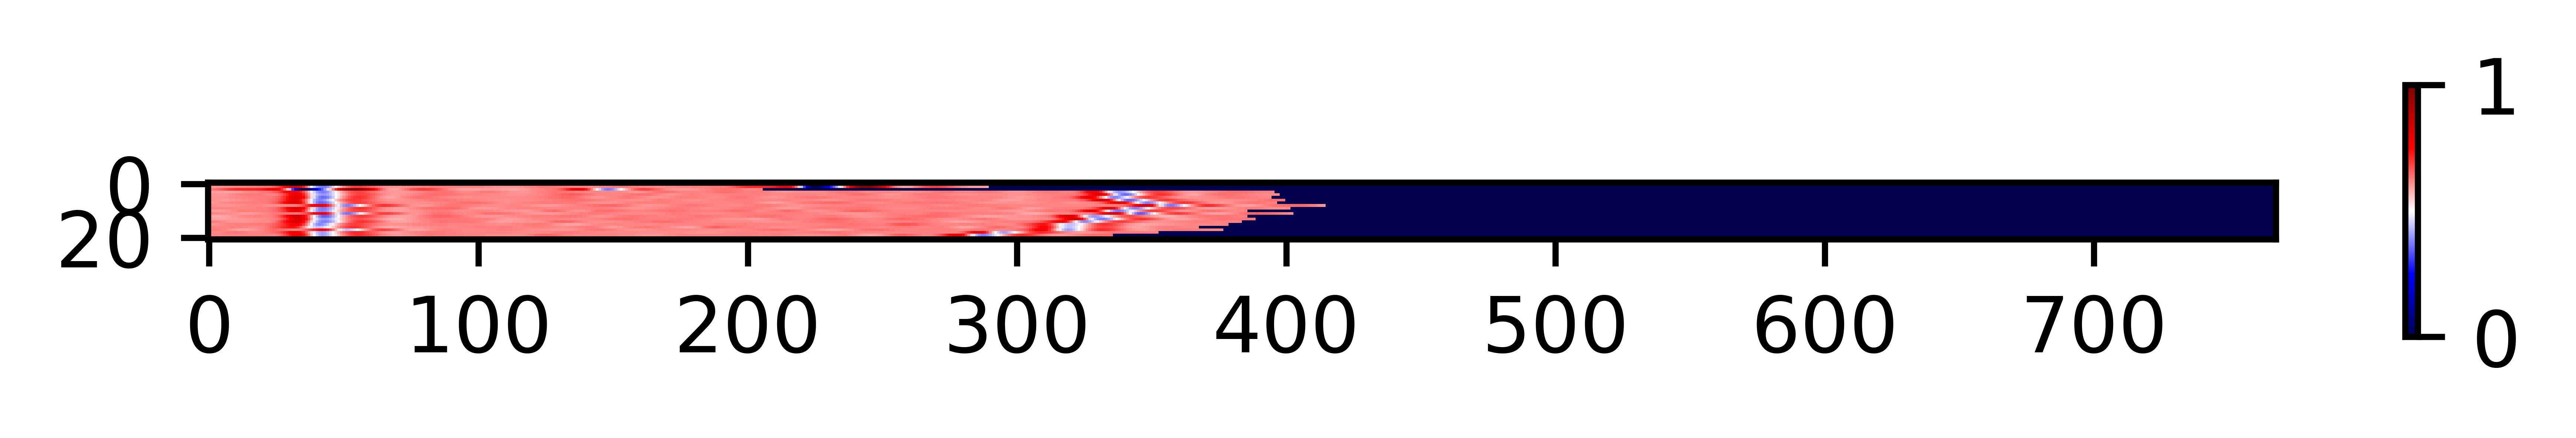

In [8]:
plt.imshow(normal,cmap='seismic')
plt.colorbar(shrink=0.15)

In [9]:

fig, ax = plt.subplots(1,1,figsize=(20, 2.5))
plot_1(ecg=ecg_af, attention =None, attention_area=None, top_k= None,
        peaks= peaks,valid_p_peaks=None,RR_length_outlier=None,peaks_index=index,at_thres=0.0,
        fig=fig, ax=ax, 
        sample_rate=300,line_w=1.0,
          title = 'ECG',
          ecg_amp=1.2,timetick=0.2)
plt.show()